## ggplot2画图

### 数据
`ggplot2`接受的输入数据一般是`data.frame`。使用`iris`数据集作为示范。
### 基本概念
+ Data 数据，Mapping 映射
+ Scale 标尺
+ Geometric 几何对象
+ Statistics 统计变换
+ Coordinate 坐标系统
+ Layer 图层
+ Legend 图例
+ beautiful美化

### 语法框架
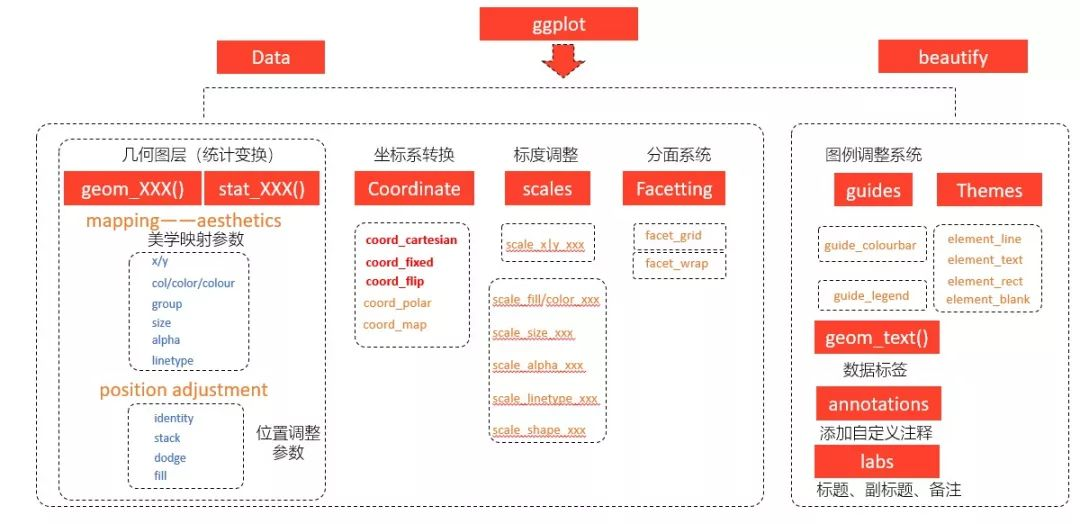

    ggplot(data, aes(x= , y= ))+ # 基础图层，不出现任何图形元素
    geom_xxx()|stat_xxx()+ # 几何图层或统计变换，出现图形元素
    coord_xxx()+ # 坐标变换，默认笛卡尔坐标系
    scale_xxx()+ # 标度调整，调整具体的标度
    facet_xxx()+ # 分面，将其中一个变量进行分面变换
    guides() + # 图例调整
    theme() # 主题系统
### 几何对象
几何对象，就是你要用什么图表示这组数据。`ggplot2`提供了众多几何对象`geom_xyz()`供大家选择。几何对象有一个`position`选项，用于指定如何在空间内布置相同取值的集合对象。`dodge`为并排模式；`fill`为堆叠模式，并归一化为相同的高度；`stack`为纯粹的堆叠模式；`jitter`会在X和Y两个方向增加随机的扰动来防止对象之间的覆盖。

|几何对象函数|描述|其他|
|:------|:------:|:------|
|geom_point|点图|`geom_point(position="jitter") == geom_jitter()`避免重叠|
|geom_line|折线图|可以通过`smooth`参数平滑处理|
|geom_bar|柱状图|X轴是离散变量|
|geom_area|面积图||
|geom_histogram|直方图|X轴是连续的|
|geom_boxplot|箱线图||
|geom_rect|二维长方形图||
|geom_segment|线段图||
|geom_path|几何路径|由一组点按顺序连接|
|geom_curve|曲线||
|geom_abline|斜线|有斜率和截距指定|
|geom_hline|水平线|常用于坐标轴绘制|
|geom_vline|竖线|常用于坐标轴绘制|
|geom_text|文本||


`ggplot2`唯一不支持的常规平面图形是**雷达图**。
#### aesthetics specifications 美学参数

|参数|描述|
|:---|:---|
|color/col/colour|指定点、线和填充区域边界的颜色|
|fill|指定填充区域的颜色，如条形和密度区域|
|alpha|指定颜色的透明度，从0（完全透明）到1（不透明）|
|size|指定点的尺寸或线的宽度，单位是mm|
|angle|角度，只有部分几何对象有，如geom_text文本的摆放角度，geom_spoke中短棒摆放角度|
|linetype|指定线条的类型|
|shape|点的形状，为[0, 25]区间的26个整数、
|vjust|垂直位置微调，在（0，1）区间的数字或位置字符串：0=buttom, 0.5=middle, 1=top，区间外的数字微调比例控制不均|
|hjust|水平位置微调，在（0，1）区间的数字或位置字符串：0=buttom, 0.5=middle, 1=top，区间外的数字微调比例控制不均|

|不常用映射的美学参数|描述|
|:-----------------|:---|
|binwidth|直方图的宽度|
|notch|表示方块图是否为缺口|
|sides|表示地毯图的安置位置（b底部，l左部，t顶部，r右部，bl左下角等）|
|width|箱线图或柱状图的宽度，从（0，1）柱状图默认0.9即90%|
|lineend|表示指定宽线条端部形状，有三种：round半圆形，square增加方形，butt默认不变，常用于geom_path和geom_line几何对象|
|family|字体，内置有三种：sans, serif, mono|
|fontface|字型，plain常规，bold粗体，italic斜体，bold.italic粗斜体。|
|lineheight|长文本换行行距，常用于geom_text等文本对象|

### 图层
`ggplot2`的绘图过程像PS，有一个图层的理念，每个图层通过`+`将不同图层叠加起来生成最后的统计图形。

### 基本绘图

In [1]:
library(ggplot2)

In [2]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Hadley对`data.frame`提出了一个是否**tidy**的概念，抽象的讲就是一个变量必须有自己独立的一列，一个观测必须有自己独立的一行，每个取值必须有自己独立的一个单元格。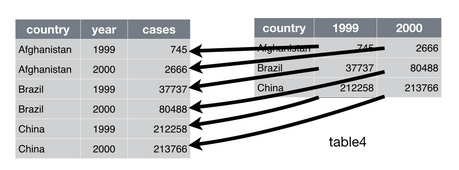

左边的数据是tidy的，右边的数据不是。`ggplot2`的数据要求是`tidy`的。

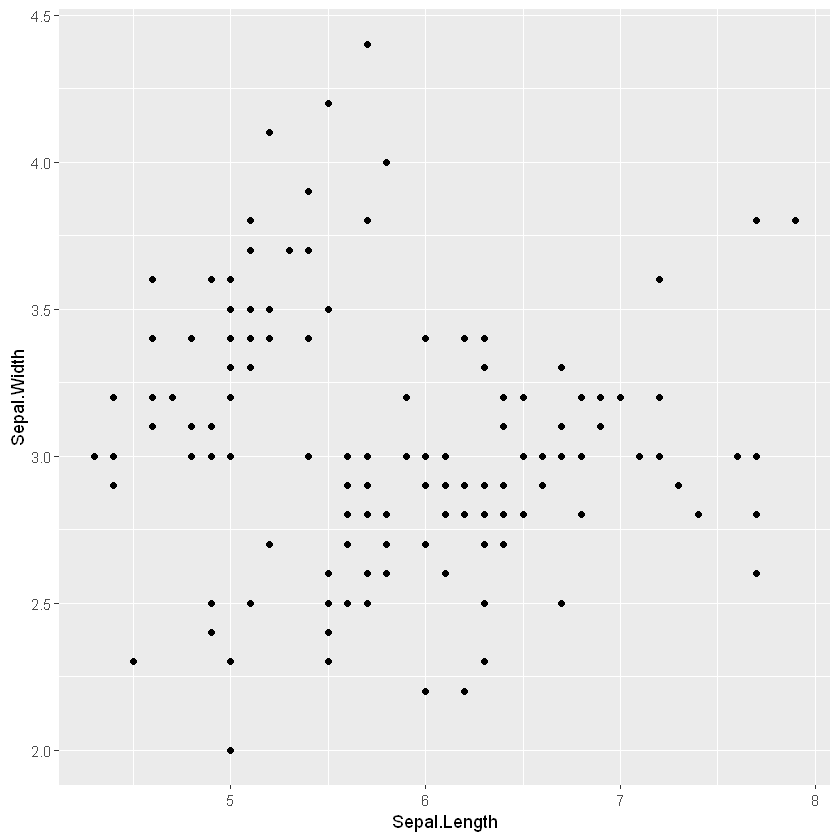

In [3]:
p.scatter <- ggplot(iris) + geom_point(aes(x=Sepal.Length, y=Sepal.Width))
p.scatter

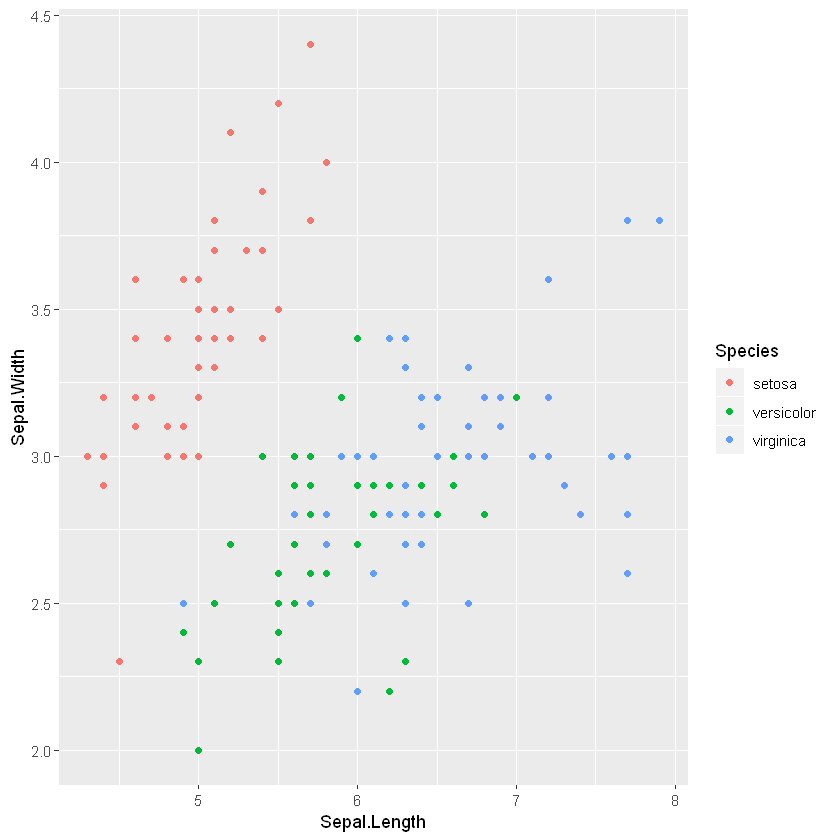

In [4]:
# One piece of information missing in the plots above is what species each plant is
p.scatter <- ggplot(iris) + geom_point(aes(x=Sepal.Length, y=Sepal.Width, color=Species))
p.scatter

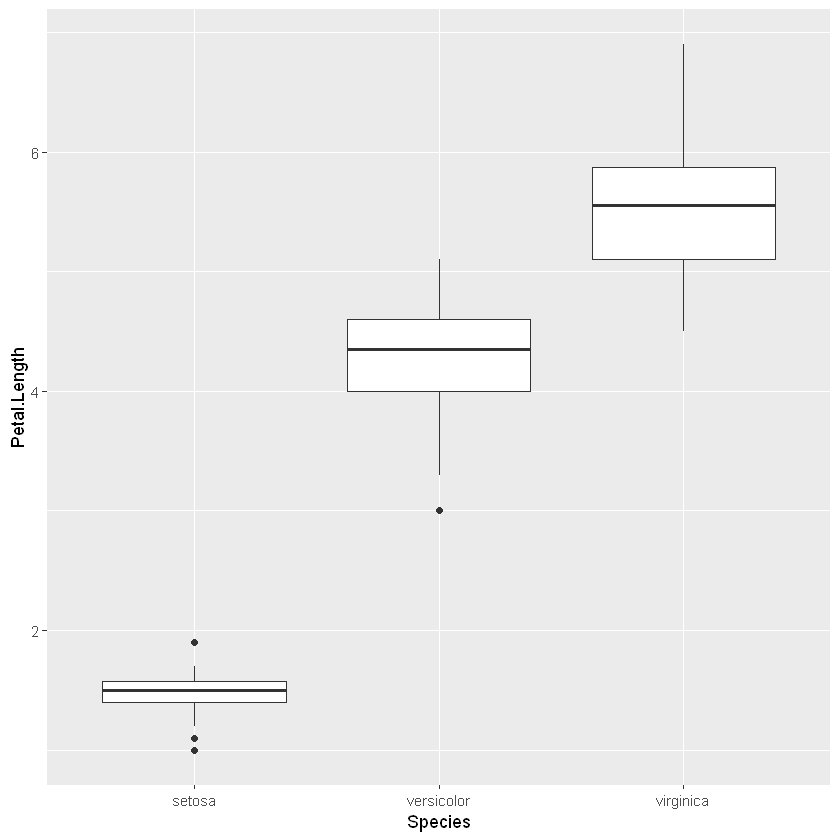

In [5]:
# boxplot箱线图
p.box <- ggplot(iris) + geom_boxplot(aes(x=Species, y=Petal.Length))
p.box

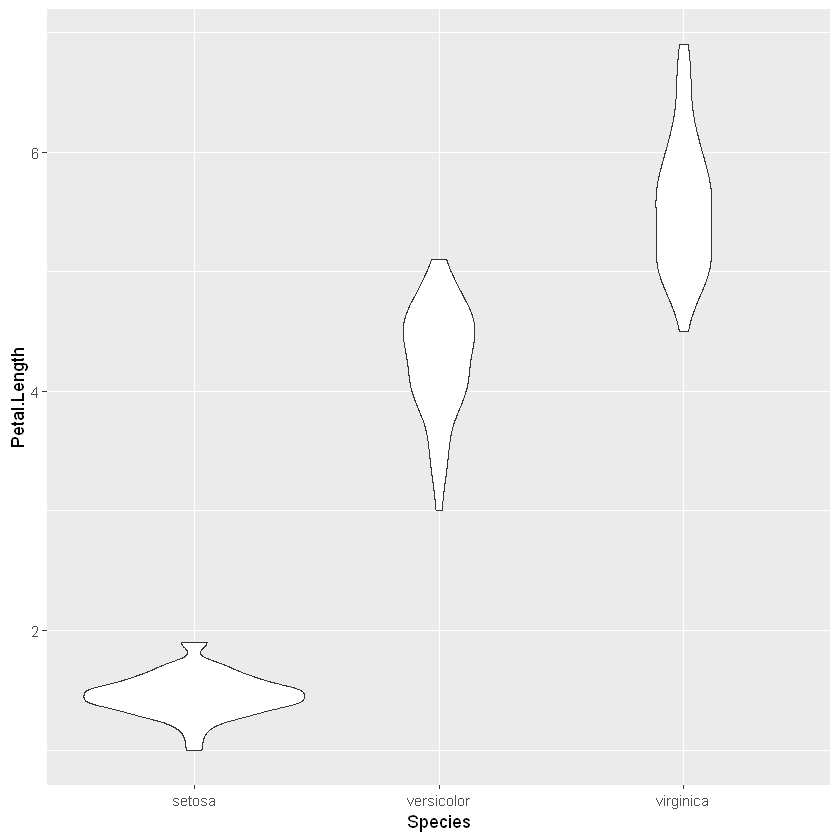

In [7]:
# 小提琴图
p.violin <- ggplot(iris) + geom_violin(aes(x=Species, y=Petal.Length))
p.violin

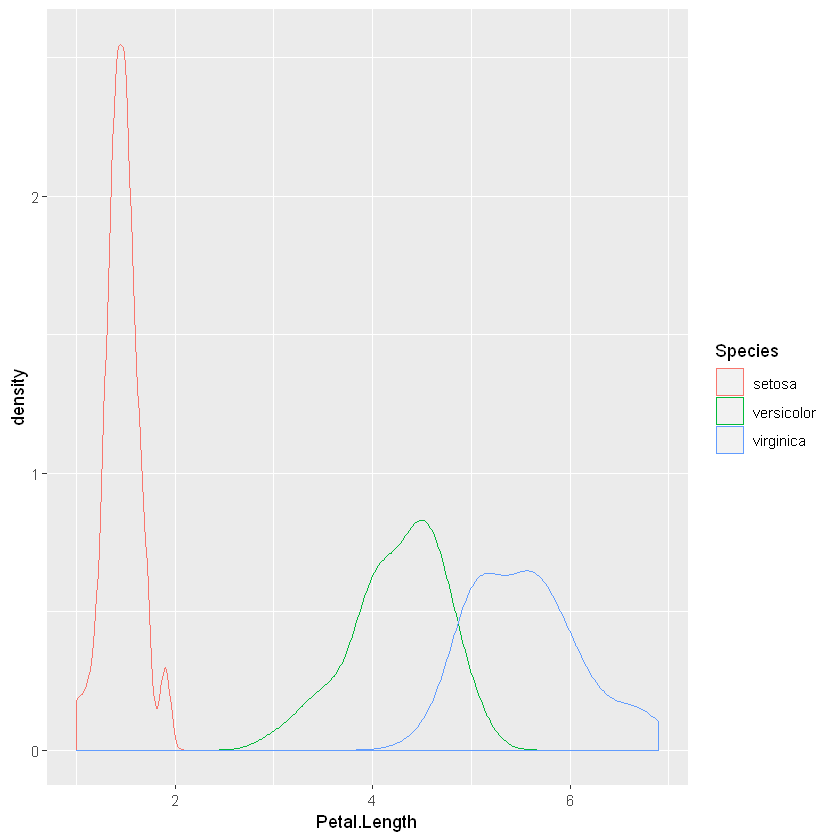

In [8]:
# 密度图
p.density <- ggplot(iris) + geom_density(aes(x=Petal.Length, colour=Species))
p.density

## 分面和布局
分面就是分组绘图，根据定义的规则，将数据分为多个子集，每个子集按照统一的规则单独制图，排布在一个页面上。`ggplot2`提供两种分面模式：`facet_grid()`和`facet_wrap()`。

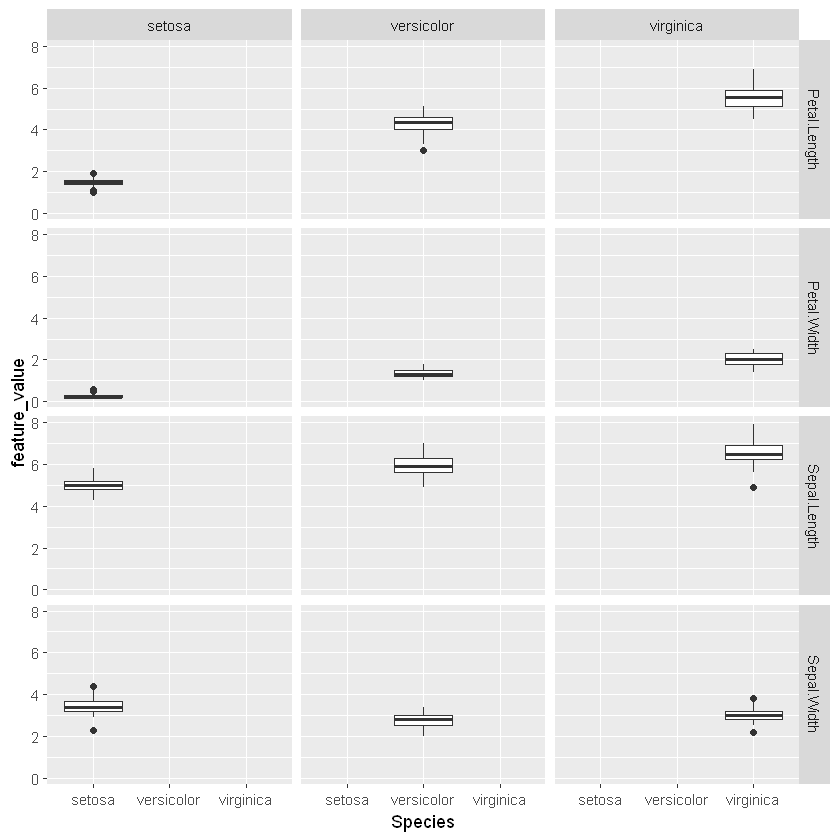

In [12]:
library(tidyr)
library(dplyr)
# 将数据变为tidy的
tidy_iris <- iris %>% gather(feature_name, feature_value, one_of(c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width")))

p.box.facet <- ggplot(tidy_iris) + geom_boxplot(aes(x=Species, y=feature_value))+facet_grid(feature_name~Species)
p.box.facet

`facet_grid()`是一个二维的矩形布局，每个子集的位置由`行位置变量~列位置变量`决定。

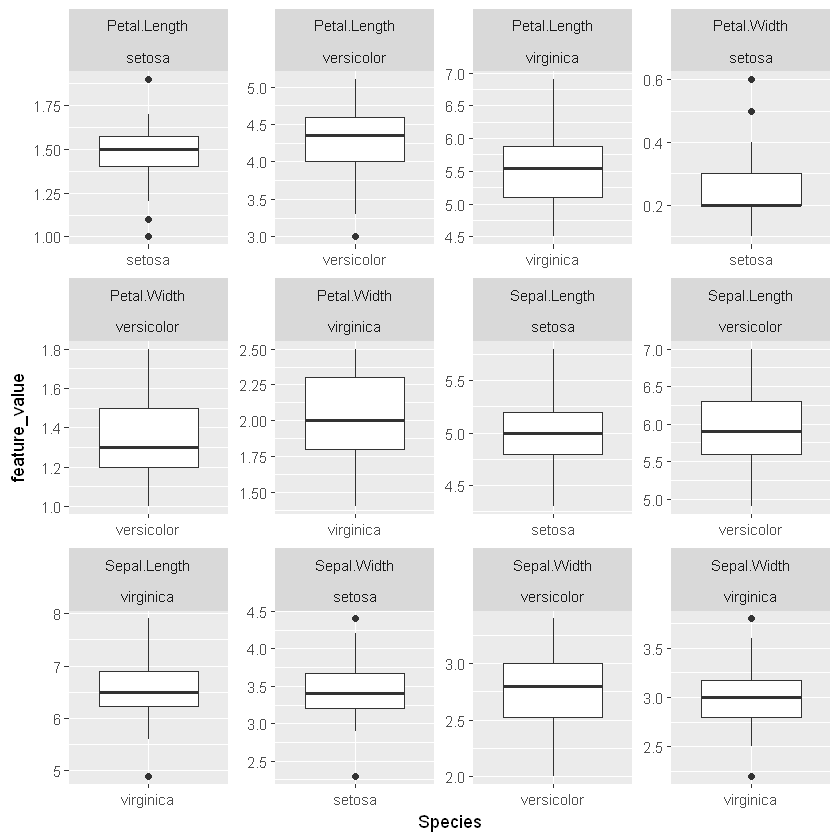

In [13]:
p.box.facet <- ggplot(tidy_iris) + geom_boxplot(aes(x=Species, y=feature_value)) + facet_wrap(~feature_name+Species, scales="free")
p.box.facet

`facet_wrap()`生成了一个动态调整的一维布局，根据`~位置变量1+位置变量2+...`来确定每个子集的位置，先逐行排列，放不下移动到下一行。`scales="free"`让每个子图的坐标系适合自己的数据，便于在有限的空间充分展示子图的细节，但也失去了不同子图之间比较的作用，需要谨慎使用。

布局，使用`grid`包实现

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



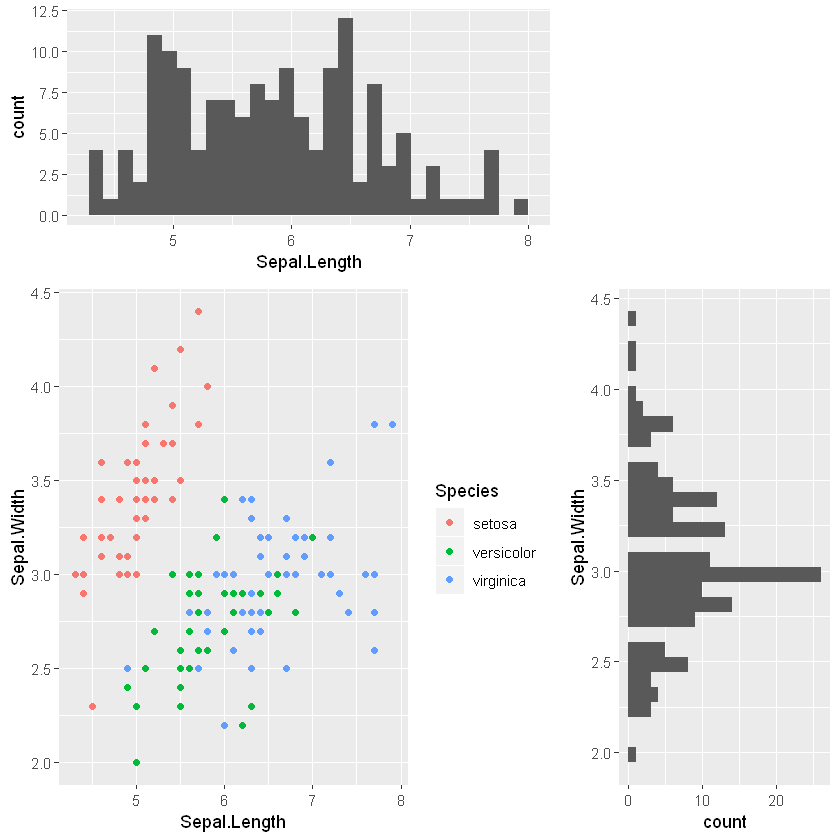

In [16]:
library(grid)
p.hist.len <- ggplot(iris) + geom_histogram(aes(x=Sepal.Length))
p.hist.wid <- ggplot(iris) + geom_histogram(aes(x=Sepal.Width)) + coord_flip()
grid.newpage()
pushViewport(viewport(layout=grid.layout(3,3)))
print(p.scatter, vp=viewport(layout.pos.row=2:3, layout.pos.col=1:2))
print(p.hist.len, vp=viewport(layout.pos.row=1, layout.pos.col=1:2))
print(p.hist.wid, vp=viewport(layout.pos.row=2:3, layout.pos.col=3))